x_train
[0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]


y_train
[ 0.02052485 -0.02798231 -0.01236044  0.12343289  0.01475197  0.07173089
  0.00309937  0.26235324  0.38457902  0.47092826  0.76928733  0.85382069
  1.18367371  1.41635555  1.66658028  1.82914267  1.80129475  1.74915078
  1.44263229  0.99712545]


X
[[0.         0.         1.        ]
 [0.10526316 0.01108033 1.        ]
 [0.21052632 0.04432133 1.        ]
 [0.31578947 0.09972299 1.        ]
 [0.42105263 0.17728532 1.        ]
 [0.52631579 0.27700831 1.        ]
 [0.63157895 0.39889197 1.        ]
 [0.73684211 0.54293629 1.        ]
 [0.84210526 0.70914127 1.        ]
 [0.94736842 0.89750693 1.        ]
 [1.05263158 1.10803324 1.        ]
 [1.15789474 1.34072022 1.        ]
 [1.26315789 1.59556787 1.        ]
 [1.36842105 1.87257618 1.        ]
 [1.

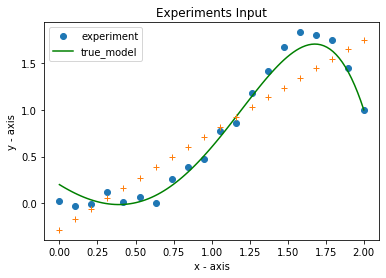

In [45]:
#  Assignment 1 - ii - Least Squares Regression

# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np

#
th0 = 0.2
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

#data range
r_start = 0
r_end = 2
N  = 20
step = (r_end - r_start) / N
x_train = np.linspace(r_start, r_end, num= N)

print("x_train")
print(x_train)
print("\n")

def get_y_train(t0, t1, t2, t3, t4, t5, mu, sigma, N, x):

  noise = np.random.normal(mu,sigma, size=(N,))
  y = t5*x**5 + t4*x**4 + t3*x**3 + t2*x**2 + t1*x + t0 + noise

  return (y)

y_train = get_y_train(th0, th1, th2, th3, 0, th5, 0, 0.1, 20, x_train)

print("y_train")
print(y_train)
print("\n")

plt.plot(x_train, y_train, marker='o',linewidth=0, label = 'experiment', ) 
x_true = np.linspace(0, 2, 100)
y_true = th5*x_true**5 + th3*x_true**3 + th2*x_true**2 + th1*x_true + th0

plt.plot(x_true, y_true, '-g', label= 'true_model')

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 

# giving a title to my graph 
plt.title('Experiments Input') 

# function to show the plot 
plt.legend()

poly_deg = 2
Q_train = np.zeros(shape = (N,poly_deg+1))
Q_train[:, -1] = 1

for i in range(1,poly_deg+1):
  Q_train[:,i-1] = np.power(x_train,i)

print("X")
print(Q_train)
print("\n")

theta = np.linalg.pinv(Q_train.T.dot(Q_train)).dot(Q_train.T).dot(y_train)

print("Theta's")
print(theta)
print("\n")

Q_train.dot(theta)
print("y_est")
print(Q_train.dot(theta))
print("\n")

plt.plot(x,Q_train.dot(theta), marker='+',linewidth=0, label='poly fit degree =' + str(poly_deg))

plt.show()